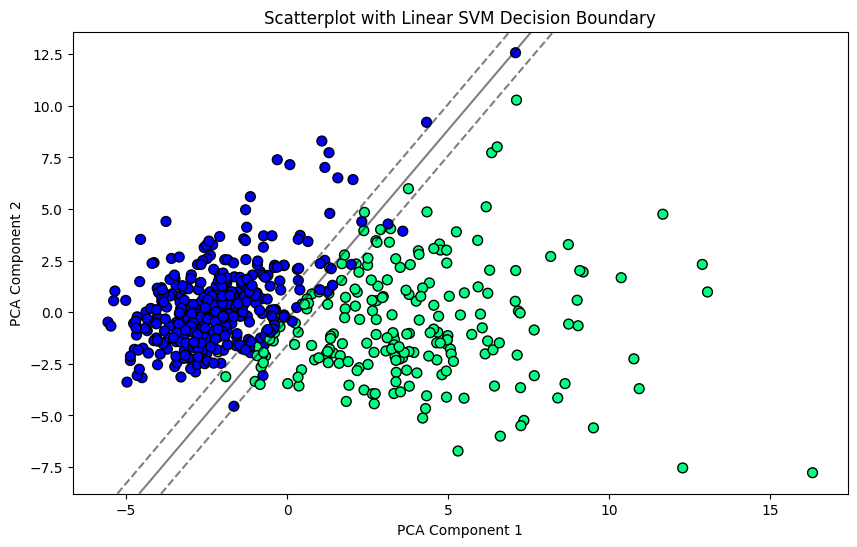

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load and preprocess data
file_path = '/content/bcdata_SVM.csv'  # Update this path accordingly
data = pd.read_csv(file_path)

# Drop unnecessary columns (like 'id' and 'Unnamed: 32')
data_cleaned = data.drop(['id', 'Unnamed: 32'], axis=1)

# Encode the 'diagnosis' column ('M' -> 1, 'B' -> 0)
data_cleaned['diagnosis'] = data_cleaned['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

# Split the dataset into features (X) and target (y)
X = data_cleaned.drop('diagnosis', axis=1).values
y = data_cleaned['diagnosis'].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train a linear SVM model
model = SVC(kernel='linear', C=1)
model.fit(X_pca, y)

# Function to plot SVM decision boundary
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# Plot the scatter plot with the decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=50, cmap='winter', edgecolor='k')
plt.title('Scatterplot with Linear SVM Decision Boundary')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Plot the decision boundary
plot_svc_decision_function(model)
plt.show()
